# Exercício 01
## Exploração de Dados
### Alunos:

- Fernanda Tostes Marana (4471070)
- Matheus Aparecido do Carmo Alves (9791114)
- Thais Bianchini (9791010)

## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [0]:
import numpy as np
import pandas as pd

salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

### Questão 01. 
Demonstre o porquê dessa conclusão estar equivocada.
   - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

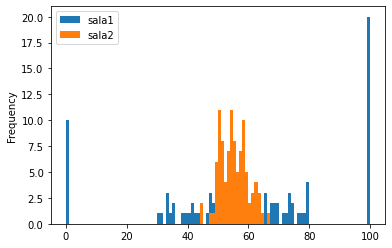

In [0]:
import pandas as pd
import numpy as np

n_salas = np.array(salas).T.tolist()

df_salas = pd.DataFrame(data=n_salas,columns=['sala1', 'sala2'])

df_salas.plot.hist(by= i, bins=100 )
#df_salas.boxplot(column=['sala1', 'sala2'])




---

### Questão 02.
Calcule o número de aprovados em cada uma das salas.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [0]:
arraySalas = df_salas.values
totalAlunos = len(arraySalas)

aprovados = np.argwhere(arraySalas>=50)
aprovados = aprovados[:,1]

print("Total de Alunos: %d" % totalAlunos)
print("Aprovados da Sala 1: %d" % len(np.argwhere(aprovados == 0)))   
print("Aprovados da Sala 2: %d" % len(np.argwhere(aprovados == 1)))            



Total de Alunos: 100
Aprovados da Sala 1: 68
Aprovados da Sala 2: 90


## Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data`.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.



In [0]:
import pandas as pd

iris = pd.read_csv("iris.data", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica




---


### Questão 03.

Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto.

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [0]:
import numpy as np
from scipy.stats import skew, kurtosis

for i in range (0,4):
  print("--- Característica: %d ---" % (i+1))
  print("Média: %f" % np.mean(iris[i])) 
  print("Variância: %f" % np.var(iris[i]))  
  print("Obliquidade: %f" % skew(iris[i]))   
  print("Achatamento: %f" % kurtosis(iris[i]))  

--- Característica: 1 ---
Média: 5.843333
Variância: 0.681122
Obliquidade: 0.311753
Achatamento: -0.573568
--- Característica: 2 ---
Média: 3.054000
Variância: 0.186751
Obliquidade: 0.330703
Achatamento: 0.241443
--- Característica: 3 ---
Média: 3.758667
Variância: 3.092425
Obliquidade: -0.271712
Achatamento: -1.395359
--- Característica: 4 ---
Média: 1.198667
Variância: 0.578532
Obliquidade: -0.103944
Achatamento: -1.335246




---

### Questão 04.

Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil).


In [0]:
df_iris = pd.DataFrame(data=iris)
print(df_iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


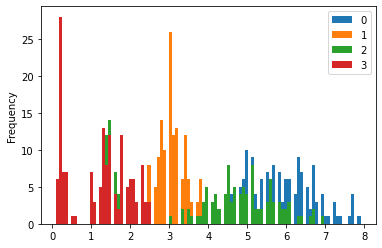

In [0]:
df_iris.plot.hist(by= i, bins=100 )


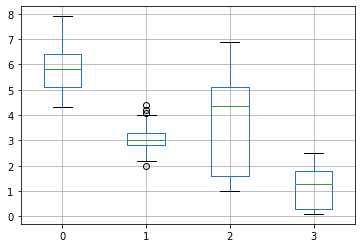

In [0]:
df_iris.boxplot()

In [0]:
median, percentile = np.median(df_iris.iloc[:,0:4]), np.percentile(df_iris.iloc[:,0:4],50,interpolation='nearest')
print('Median          :',median,', equivalent to:')
print('Percentile (50%):',percentile)

list_iris = np.array(df_iris.iloc[:,0:4]).reshape((len(df_iris))*len(df_iris.iloc[0,0:4]))
print('\nNumber of samples before median value:',\
      len(np.argwhere(list_iris <= median)))
print('Total of samples:',(len(df_iris))*len(df_iris.iloc[0,0:4]))

Median          : 3.2 , equivalent to:
Percentile (50%): 3.2

Number of samples before median value: 309
Total of samples: 600
